In [2]:
import numpy as np
from pymultifracs.simul import mrw

In [3]:
def create_synth_data(Hs, lams, n_per_class = 100, length = 2048, L = None, concatenate_result = True):
    """ 
    Hs: list of Hurst exponent
    lams: list of lambdas
    """
    if np.isscalar(Hs):
        Hs = [Hs]
    if np.isscalar(lams):
        lams = [lams] * len(Hs)
    if L is None:
        L = length
    
    Xs = list()
    ys = list()
    for label, H, lam in zip(range(len(Hs)),Hs,lams):
        X_ = mrw(shape=(length,n_per_class), H=H, lam=lam, L=L).T
        Xs.append(X_)
        ys.append(label * np.ones(n_per_class, dtype=int))
    X = np.concatenate(Xs, axis = 0)
    Y = np.concatenate(ys, axis = 0)
    if concatenate_result:
        return np.concatenate([X,Y], axis=-1)
    else:
        return X,Y

In [4]:
if __name__ == "__main__":
    import matplotlib.pyplot as plt

[0 1 2 3 4]


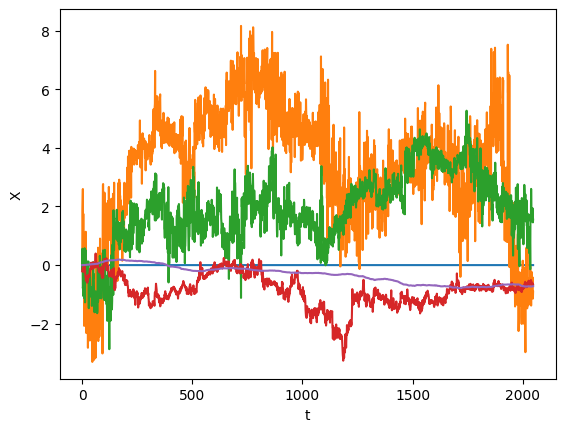

In [5]:
if __name__ == "__main__":
    X, Y = create_synth_data([0,.01,.1,.3,.8],.17,n_per_class=1,concatenate_result=False)
    print(Y)
    plt.plot(X.T)
    plt.ylabel('X')
    plt.xlabel('t')
    plt.show()

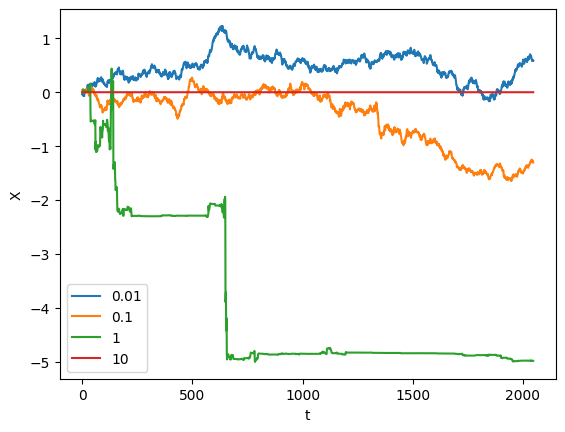

In [6]:
if __name__ == "__main__":
    lams = [.01,0.1,1,10]
    X, Y = create_synth_data([0.5,0.5,0.5,0.5],lams=lams,n_per_class=1,concatenate_result=False)
    plt.plot(X.T, label = lams)
    plt.ylabel('X')
    plt.xlabel('t')
    plt.legend(loc = 'lower left')
    plt.show()

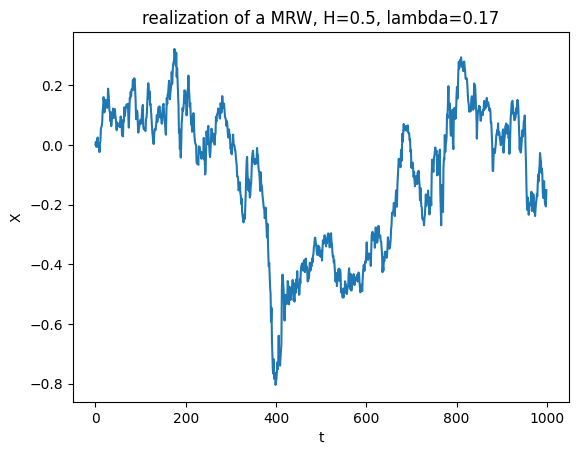

In [7]:
if __name__ == "__main__":
    plt.plot(mrw(shape=1000, H=.5, lam=.17, L=1000))
    plt.title('realization of a MRW, H=0.5, lambda=0.17')
    plt.ylabel('X')
    plt.xlabel('t')
    plt.show()